# Example: Lagrange Points

In this example, we will plot the Lagrange points for the system as a function of $\pi_2$.

## Plotting the Lagrange Points

In the nondimensional coordinates, we know that $L_4$ and $L_5$ have analytical solutions:

$$\begin{aligned}&L_4: & x^* &= \frac{1}{2} - \pi_2 & y^* &= \frac{\sqrt{3}}{2}\\&L_5: & x^* &= \frac{1}{2} - \pi_2 & y^* &= -\frac{\sqrt{3}}{2}\end{aligned}$$

However, the collinear Lagrange points do not have an analytical solution, and must be approximated numerically. To do so, we will use [`scipy.optimize.newton()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) in Python and [`fzero`](https://www.mathworks.com/help/matlab/ref/fzero.html) in Matlab.

The formula for the nondimensional position of the collinear Lagrange points is:

$$0 = x^* - \frac{1 - \pi_2}{\left\lvert x^* + \pi_2\right\rvert ^3}\left(x^* + \pi_2\right) - \frac{\pi_2}{\left\lvert x^* - 1 + \pi_2\right\rvert ^3}\left(x^* - 1 + \pi_2\right)$$

Here, we have $f(x^*, \pi_2)$, which for a given value of $\pi_2$ has three roots for $x^*$. Remember from the S-curve graph that $L_2$ has positive values, between $x^* =$ 1 and about 1.25, $L_1$ is in the middle, with $x^*$ ranging from 1 to -1, and for $L_3$, the values of $x^*$ are below $-1$.

Both `scipy.optimize.newton` and `fzero` depend on having a good guess of the initial point to get to the right Lagrange point. My suggestion is to use the following initial guess range for both functions, depending on which Lagrange point you're looking for:

* $L_2$:
  * Python (`scipy.optimize.newton`): `x0=1`
  * MATLAB (`fzero`): `[1, 1.5]`
* $L_1$:
  * Python (`scipy.optimize.newton`): `x0=0`
  * MATLAB (`fzero`): Either `[0, -0.5]` or `[0, 0.5]` depending on the value of $\pi_2$
* $L_3$:
  * Python (`scipy.optimize.newton`): `x0=-1`
  * MATLAB (`fzero`): `[-1, -1.5]`
  
For some reason, the `fzero()` in MATLAB seems much more sensitive to the initial guess value, and if you only provide a single value for the initial guess, it chooses a positive value as the second part of the interval. Thus, if the root is below your initial guess the MATLAB solver will not be able to find it.

In [1]:
# %matplotlib notebook
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [2]:
# This code defines a nice shape for the center of mass of the system.
circle = mpath.Path.unit_circle()
wedge_1 = mpath.Path.wedge(90, 180)
wedge_2 = mpath.Path.wedge(270, 0)

verts = np.concatenate([circle.vertices, wedge_1.vertices[::-1, ...], wedge_2.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, wedge_1.codes, wedge_2.codes])
center_of_mass = mpath.Path(verts, codes)

In [3]:
# These masses represent the Earth-Moon system
m_1 = 5.974E24  # kg
m_2 = 7.348E22 # kg
pi_2 = m_2/(m_1 + m_2)
# These give us the coordinates of the orbits of m_2 and m_1
x_2 = (1 - pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_2 = (1 - pi_2) * np.sin(np.linspace(0, np.pi, 100))
x_1 = (-pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_1 = (-pi_2) * np.sin(np.linspace(0, np.pi, 100))

First, we will demonstrate the Python solver. Like for the `solve_ivp` function, we need to define a function that returns a value given the single input `xstar`. Python is flexible enough to allow us to define `pi_2` as another parameter.

In [4]:
def collinear_lagrange(xstar, pi_2):
    """Calculate the resultant of the collinear Lagrange point equation.
    
    This is a function f(xstar, pi_2), where xstar is the nondimensional x coordinate
    and pi_2 is the nondimensional mass ratio. The function should be passed to
    scipy.optimize.newton (or another Newton solver) to find a value for xstar
    that satsifies the equation, for a given value of pi_2.
    """
    first_term = xstar
    second_term = (1 - pi_2)/np.abs(xstar + pi_2)**3 * (xstar + pi_2)
    third_term = pi_2 / np.abs(xstar - 1 + pi_2)**3 * (xstar - 1 + pi_2)
    return first_term - second_term - third_term

Then we need to pass this to the Newton solver. The function signature is:

```python
newton(func, x0, args)
```

where `func` is the function to be solved, `x0` is the initial guess, and `args` is a tuple of additional arguments to pass to `func`.

In [5]:
L_2 = newton(func=collinear_lagrange, x0=1, args=(pi_2,))
L_1 = newton(func=collinear_lagrange, x0=0, args=(pi_2,))
L_3 = newton(func=collinear_lagrange, x0=-1, args=(pi_2,))
print("L_1 =", L_1, "L_2 =", L_2, "L_3 =", L_3)

L_1 = 0.8369154703225321 L_2 = 1.1556818961296604 L_3 = -1.0050626166357435


Remember, these are in nondimensional coordinates. We can then plot the Lagrange points relative to $m_1$ and $m_2$ in the rotating frame of reference.

<IPython.core.display.Javascript object>


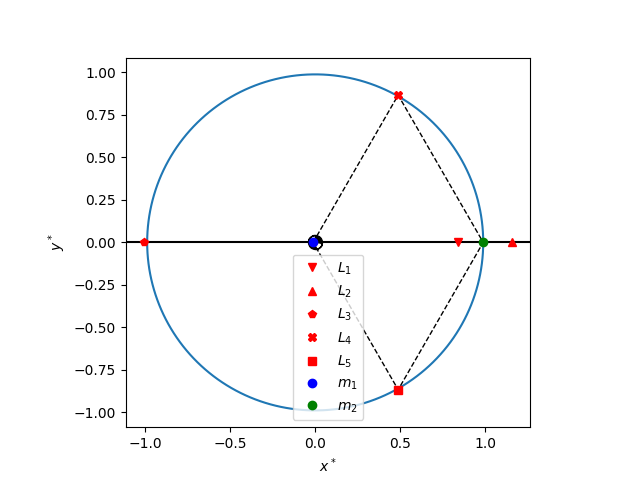

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel("$x^*$")
ax.set_ylabel("$y^*$")

# Plot the orbits
ax.axhline(0, color='k')
ax.plot(np.hstack((x_2, x_2[::-1])), np.hstack((y_2, -y_2[::-1])))
ax.plot(np.hstack((x_1, x_1[::-1])), np.hstack((y_1, -y_1[::-1])))
ax.plot([-pi_2, 0.5 - pi_2, 1 - pi_2, 0.5 - pi_2, -pi_2], [0, np.sqrt(3)/2, 0, -np.sqrt(3)/2, 0], 'k', ls="--", lw=1)

# Plot the Lagrange Points and masses
ax.plot(L_1, 0, 'rv', label="$L_1$")
ax.plot(L_2, 0, 'r^', label="$L_2$")
ax.plot(L_3, 0, 'rp', label="$L_3$")
ax.plot(0.5 - pi_2, np.sqrt(3)/2, 'rX', label="$L_4$")
ax.plot(0.5 - pi_2, -np.sqrt(3)/2, 'rs', label="$L_5$")
ax.plot(0, 0, 'k', marker=center_of_mass, markersize=10)
ax.plot(-pi_2, 0, 'bo', label="$m_1$")
ax.plot(1 - pi_2, 0, 'go', label="$m_2$")
ax.legend()
ax.set_aspect("equal")

In MATLAB, the function definition ends up being a little bit different, since we want to be able to have $\pi_2$ as the parameter. First, we need to define a function that takes both `xstar` and `pi_2` as arguments:

```matlab
>> collinear_lagrange = @(xstar, pi_2) xstar - (1 - pi_2)/abs(xstar + pi_2).^3 .* (xstar + pi_2) - pi_2 / abs(xstar - 1 + pi_2).^3 .* (xstar - 1 + pi_2);
```

The `@(xstar, pi_2)` tells MATLAB this is an anonymous function. We could also put this into a `.m` file as something like (Note: I didn't test this):

```matlab
function x = collinear_lagrange(xstar, pi_2)
    x = xstar - (1 - pi_2)/abs(xstar + pi_2).^3 .* (xstar + pi_2) - pi_2 / abs(xstar - 1 + pi_2).^3 .* (xstar - 1 + pi_2);
end
```

Then, we need to define a second function which calls the first for a defined value of `pi_2`:

```matlab
>> pi_2 = 3e-6;
>> fun = @(x) collinear_lagrange(x, pi_2);
```

If you change the value of `pi_2`, I'm pretty sure you'll have to redefine `fun` by running the second line again. I wouldn't swear to that, and it depends on how MATLAB defines functions. But better safe than sorry!

After that, we can call `fzero()` with the second function to find the roots of the collinear Lagrange point equation. The signature of `fzero()` is:

```matlab
fzero(function, x0, options)
```

The first argument is the function to solve, the second argument is an array that gives the range for the initial guess, and the third argument specifies options to the solver. I'd suggest setting:

```matlab
>> options = optimset('Display','iter');
```

and passing that to `fzero()` so you can see what the solver is doing internally and make sure it's finding the values you expect. Calling `fzero()` looks like:

```matlab
>> x = fzero(fun, [0, 1], options)
```

For the parameters we've set up here, this call will actually give an error that it can't find a root in the given range. MATLAB seems much more sensitive to the choice of initial values than Python, I'm not sure why. You'll need to experiment to find appropriate initial guesses, based on the S-curve graph. However, once a solution is found, it should be nearly identical to the solution found in Python.